✅ 라이브러리 로딩 시작...
✅ 라이브러리 로딩 완료!

🧹 1단계: 정제된 데이터 로딩
📂 이전 단계에서 생성한 '정제된' 데이터 파일을 불러옵니다...
✅ 정제된 Flow 데이터 (381,559개) 로딩 완료
✅ 정제된 Packet 데이터 (381,559개) 로딩 완료

🎯 2단계: 대표 샘플 생성 (층화 추출)
🎯 목표 총 샘플 수: 50,000개
✅ 샘플링 완료! 총 50,000개 대표 샘플 인덱스 확보.

🔧 3단계: [업그레이드] 코드북 기반의 일반화된 특징 추출 함수

🔬 4단계: 실험 실행 및 평가 함수 정의

🚀 5단계: 최적의 N을 찾기 위한 자동화된 실험 실행

===== 🧪 실험 시작: N = 2 =====
🚀 N=2개 패킷으로 특징 추출 중...
✅ 특징 추출 완료! (성공 샘플: 50,000/50,000, 소요 시간: 45.77초)
⏳ RandomForest 모델 학습 중... (학습 데이터: 40,000개)

--- 📊 결과 리포트 ---
사용한 패킷 수 (N): 2
Micro F1 Score: 0.6854
페널티: -0.0
🏆 최종 조정 점수: 0.6854
---------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3429
           1       0.57      0.56      0.57      2425
           2       0.66      0.69      0.68      3557
           3       0.25      0.21      0.23       589

    accuracy                           0.69     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg  

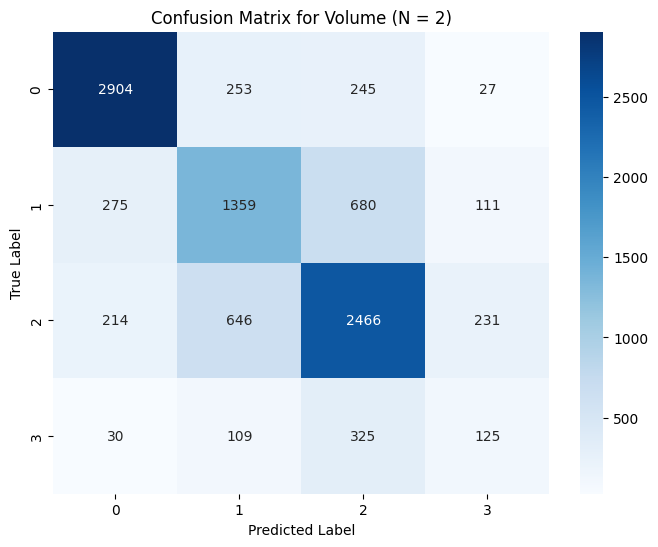


===== 🧪 실험 시작: N = 3 =====
🚀 N=3개 패킷으로 특징 추출 중...
✅ 특징 추출 완료! (성공 샘플: 50,000/50,000, 소요 시간: 49.84초)
⏳ RandomForest 모델 학습 중... (학습 데이터: 40,000개)

--- 📊 결과 리포트 ---
사용한 패킷 수 (N): 3
Micro F1 Score: 0.8334
페널티: -0.1
🏆 최종 조정 점수: 0.7334
---------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3429
           1       0.79      0.79      0.79      2425
           2       0.80      0.84      0.82      3557
           3       0.41      0.24      0.30       589

    accuracy                           0.83     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.82      0.83      0.83     10000



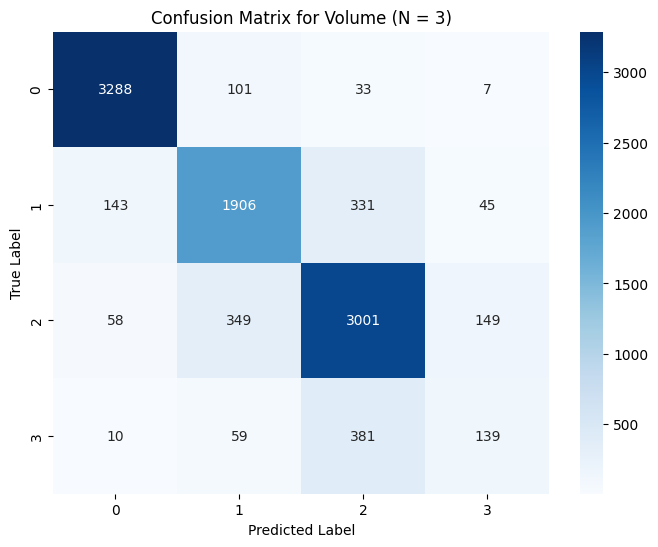


===== 🧪 실험 시작: N = 5 =====
🚀 N=5개 패킷으로 특징 추출 중...
✅ 특징 추출 완료! (성공 샘플: 50,000/50,000, 소요 시간: 41.38초)
⏳ RandomForest 모델 학습 중... (학습 데이터: 40,000개)

--- 📊 결과 리포트 ---
사용한 패킷 수 (N): 5
Micro F1 Score: 0.8813
페널티: -0.1
🏆 최종 조정 점수: 0.7813
---------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3429
           1       0.87      0.87      0.87      2425
           2       0.84      0.89      0.86      3557
           3       0.48      0.28      0.36       589

    accuracy                           0.88     10000
   macro avg       0.79      0.76      0.77     10000
weighted avg       0.87      0.88      0.88     10000



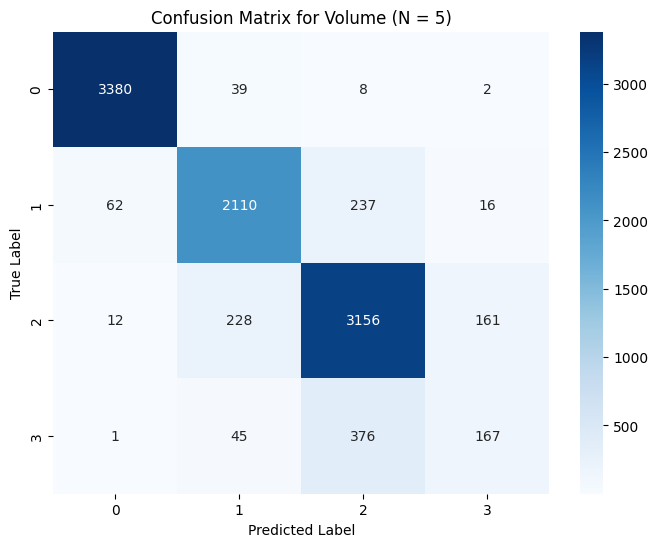


===== 🧪 실험 시작: N = 10 =====
🚀 N=10개 패킷으로 특징 추출 중...
✅ 특징 추출 완료! (성공 샘플: 50,000/50,000, 소요 시간: 41.89초)
⏳ RandomForest 모델 학습 중... (학습 데이터: 40,000개)

--- 📊 결과 리포트 ---
사용한 패킷 수 (N): 10
Micro F1 Score: 0.9355
페널티: -0.1
🏆 최종 조정 점수: 0.8355
---------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3429
           1       0.96      0.97      0.97      2425
           2       0.89      0.94      0.91      3557
           3       0.62      0.41      0.49       589

    accuracy                           0.94     10000
   macro avg       0.87      0.83      0.84     10000
weighted avg       0.93      0.94      0.93     10000



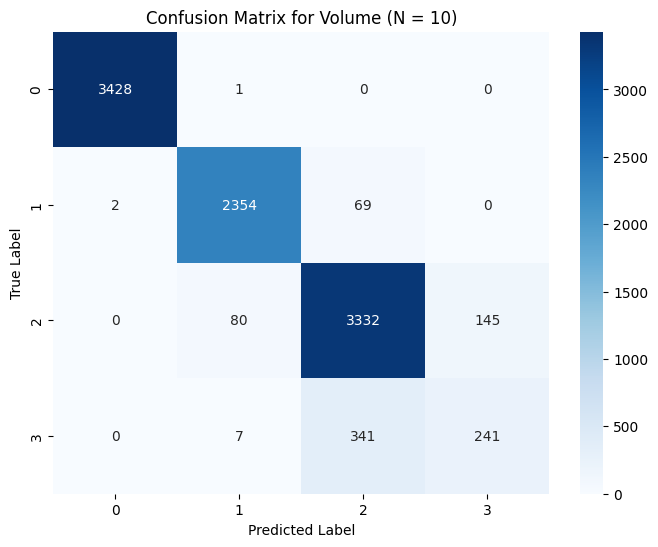


🎉 6단계: 전체 실험 결과 요약
N값에 따른 최종 조정 점수 요약:
---------------------------------
  - N =  2 : 최종 점수 = 0.6854
  - N =  3 : 최종 점수 = 0.7334
  - N =  5 : 최종 점수 = 0.7813
  - N = 10 : 최종 점수 = 0.8355
---------------------------------

✨ 결론: 최적의 패킷 개수는 [ N = 10 ] 이며, 이때의 최고 점수는 [ 0.8355 ] 입니다!

🎉 '최적 N 탐색' 실험 완료! 🎉


In [1]:
# ======================================================================
# 🚀 "Volume" 과제 재도전 파이프라인
# ======================================================================
print("✅ 라이브러리 로딩 시작...")
import joblib
import pandas as pd
import numpy as np
import time
import os
import warnings
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
print("✅ 라이브러리 로딩 완료!")

# =======================================================
# 🧹 1단계: 정제된 데이터 로딩
# =======================================================
print("\n" + "="*80)
print("🧹 1단계: 정제된 데이터 로딩")
print("="*80)
print("📂 이전 단계에서 생성한 '정제된' 데이터 파일을 불러옵니다...")
try:
    flow_data = joblib.load("task2_data/train_flow_data_cleaned.pkl")
    all_packets = joblib.load("task2_data/train_packet_data_cleaned.pkl")
    print(f"✅ 정제된 Flow 데이터 ({len(flow_data):,}개) 로딩 완료")
    print(f"✅ 정제된 Packet 데이터 ({len(all_packets):,}개) 로딩 완료")
except FileNotFoundError:
    print("❌ 정제된 파일을 찾을 수 없습니다!")
    print("   먼저 이전 파이프라인의 '데이터 정제' 부분을 실행하여 _cleaned.pkl 파일을 생성해주세요.")
    exit()

# =======================================================
# 🎯 2단계: 대표 샘플 생성
# =======================================================
print("\n" + "="*80)
print("🎯 2단계: 대표 샘플 생성 (층화 추출)")
print("="*80)
# 👈 새로운 특징 추출은 계산 비용이 높으므로, 먼저 5만개로 빠르게 테스트합니다.
target_total_samples = 50000  
print(f"🎯 목표 총 샘플 수: {target_total_samples:,}개")
stratify_key = flow_data['volume_class'].astype(str) # 이제 Volume 기준으로 층화
stratified_sampler = StratifiedShuffleSplit(n_splits=1, train_size=target_total_samples, random_state=42)
indices = np.arange(len(flow_data))
sampled_indices, _ = next(stratified_sampler.split(indices, stratify_key))
print(f"✅ 샘플링 완료! 총 {len(sampled_indices):,}개 대표 샘플 인덱스 확보.")

# =======================================================
# 🔧 3단계: [업그레이드] 코드북 기반의 일반화된 특징 추출 함수
# =======================================================
print("\n" + "="*80)
print("🔧 3단계: [업그레이드] 코드북 기반의 일반화된 특징 추출 함수")
print("="*80)

def extract_features_for_n_packets(packets, n):
    """
    [업그레이드] 주어진 'n'개의 패킷과 정확한 컬럼명을 사용하여 특징 추출
    """
    num_packets_available = len(packets)
    if num_packets_available == 0:
        return {}
    
    n_to_use = min(n, num_packets_available)
    packets = packets.iloc[:n_to_use]
    
    features = {}

    # --- 기존 통계 특징 (컬럼명 정확히 반영) ---
    for col in ['ip_len', 'ip_hdr_len', 'tcp_len', 'tcp_hdr_len']:
        if col in packets.columns:
            values = packets[col].values
            features[f'{col}_mean_{n}'] = np.mean(values)
            features[f'{col}_std_{n}'] = np.std(values) if len(values) > 1 else 0
            features[f'{col}_sum_{n}'] = np.sum(values)

    if 'packet_capture_time' in packets.columns and len(packets) > 1:
        try:
            times = pd.to_datetime(packets['packet_capture_time'])
            time_diffs = np.diff(times).astype('timedelta64[us]').astype(float)
            if len(time_diffs) > 0:
                features[f'inter_time_mean_{n}'] = np.mean(time_diffs)
                features[f'inter_time_std_{n}'] = np.std(time_diffs) if len(time_diffs) > 1 else 0
        except Exception:
            pass

    # --- ✨ 코드북 기반 신규/개선 특징 ✨ ---

    # 💡 개선 1: TCP Window Size (정확한 컬럼명 사용)
    # 대용량 통신을 예측하는 가장 강력한 단서 중 하나
    if 'tcp_window_size' in packets.columns:
        features[f'initial_tcp_win_size'] = packets['tcp_window_size'].iloc[0]
        features[f'mean_tcp_win_size_{n}'] = packets['tcp_window_size'].mean()

    # 💡 개선 2: 분리된 TCP Flags 컬럼 직접 활용 (비트 연산 불필요)
    flag_cols = ['tcp_flags_ack', 'tcp_flags_push', 'tcp_flags_reset', 'tcp_flags_syn', 'tcp_flags_fin']
    for flag in flag_cols:
        if flag in packets.columns:
            # N개 패킷 내에서 해당 플래그가 몇 번 등장했는지 카운트
            features[f'{flag}_count_{n}'] = packets[flag].sum()

    # 💡 신규 1: IP Type of Service (ToS) & Time To Live (TTL)
    # 통신의 '목적'과 '경로'에 대한 힌트
    for col in ['ip_tos', 'ip_ttl']:
        if col in packets.columns:
            values = packets[col].values
            features[f'{col}_mean_{n}'] = np.mean(values)
            # 첫 패킷의 값은 통신 초기 설정을 나타내므로 중요
            features[f'first_{col}'] = values[0]

    # 💡 신규 2: 페이로드 비율 (Payload Ratio)
    # 전체 IP 패킷 크기 대비 실제 데이터(TCP 페이로드)의 비율
    if 'ip_len' in packets.columns and 'tcp_len' in packets.columns:
        total_ip_len = packets['ip_len'].sum()
        total_tcp_len = packets['tcp_len'].sum()
        features[f'payload_ratio_{n}'] = total_tcp_len / total_ip_len if total_ip_len > 0 else 0

    return features

# =======================================================
# 🔬 4단계: 실험 실행 및 평가 함수 정의 (이전과 동일)
# =======================================================
print("\n" + "="*80)
print("🔬 4단계: 실험 실행 및 평가 함수 정의")
print("="*80)
from sklearn.metrics import f1_score

def run_experiment(n_packets, indices, packet_data_list, flow_data):
    print(f"\n===== 🧪 실험 시작: N = {n_packets} =====")
    
    print(f"🚀 N={n_packets}개 패킷으로 특징 추출 중...")
    start_time = time.time()
    features_list = []
    sampled_flow_data = flow_data.iloc[indices].reset_index(drop=True)
    
    # 특징 추출이 성공한 인덱스만 추적
    successful_indices = []
    for i in range(len(indices)):
        original_idx = indices[i]
        try:
            packet_df = packet_data_list[original_idx]
            if isinstance(packet_df, pd.DataFrame) and not packet_df.empty:
                features = extract_features_for_n_packets(packet_df, n=n_packets)
                if features:
                    features_list.append(features)
                    successful_indices.append(i)
        except Exception:
            continue
    
    X = pd.DataFrame(features_list).fillna(0)
    # 특징 추출에 성공한 샘플에 해당하는 y값만 선택
    y = sampled_flow_data.loc[successful_indices, 'volume_class']

    if X.empty:
        print("❌ 생성된 특징이 없어 실험을 중단합니다.")
        return None
    
    end_time = time.time()
    print(f"✅ 특징 추출 완료! (성공 샘플: {len(X):,}/{len(indices):,}, 소요 시간: {end_time - start_time:.2f}초)")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    print(f"⏳ RandomForest 모델 학습 중... (학습 데이터: {len(X_train):,}개)")
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    micro_f1 = f1_score(y_test, y_pred, average='micro')
    
    penalty = 0.0 if n_packets < 3 else 0.1
    final_score = micro_f1 - penalty
    
    print("\n--- 📊 결과 리포트 ---")
    print(f"사용한 패킷 수 (N): {n_packets}")
    print(f"Micro F1 Score: {micro_f1:.4f}")
    print(f"페널티: -{penalty:.1f}")
    print(f"🏆 최종 조정 점수: {final_score:.4f}")
    print("---------------------\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted Label'); plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Volume (N = {n_packets})'); plt.show()
    
    return final_score

# =======================================================
# 🚀 5단계: 최적의 N을 찾기 위한 자동화된 실험 실행 (이전과 동일)
# =======================================================
print("\n" + "="*80)
print("🚀 5단계: 최적의 N을 찾기 위한 자동화된 실험 실행")
print("="*80)

n_values_to_test = [2, 3, 5, 10] 
results = {}

for n in n_values_to_test:
    score = run_experiment(n, sampled_indices, all_packets, flow_data)
    if score is not None:
        results[n] = score

# =======================================================
# 🎉 6단계: 전체 실험 결과 요약 (이전과 동일)
# =======================================================
print("\n" + "="*80)
print("🎉 6단계: 전체 실험 결과 요약")
print("="*80)

if not results:
    print("실험 결과가 없습니다.")
else:
    best_n = max(results, key=results.get)
    best_score = results[best_n]
    
    print("N값에 따른 최종 조정 점수 요약:")
    print("---------------------------------")
    for n, score in sorted(results.items()):
        print(f"  - N = {n:2d} : 최종 점수 = {score:.4f}")
    print("---------------------------------")
        
    print(f"\n✨ 결론: 최적의 패킷 개수는 [ N = {best_n} ] 이며, 이때의 최고 점수는 [ {best_score:.4f} ] 입니다!")
    print("\n🎉 '최적 N 탐색' 실험 완료! 🎉")



In [ ]:
def plot_feature_importance(model, feature_names, n_packets):
    """학습된 모델의 피처 중요도를 시각화하는 함수"""
    print(f"\n--- 📈 피처 중요도 분석 (N = {n_packets}) ---")
    
    try:
        # cuML 모델은 .feature_importances_가 cudf.Series일 수 있음
        importances = model.feature_importances_
        if hasattr(importances, 'to_numpy'): # cuDF Series/Array인 경우
             importances = importances.to_numpy()

        feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
        
        # 상위 20개만 시각화
        top_20_features = feature_importance_df.head(20)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='importance', y='feature', data=top_20_features)
        plt.title(f'Top 20 Feature Importances for Volume (N = {n_packets})')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"피처 중요도 시각화 중 오류 발생: {e}")

✅ 라이브러리 추가 로딩 (imbalanced-learn)...

🔬 최종 모델 학습 및 평가 (N=3 고정, SMOTE 적용)
🚀 최적의 N=3 값으로 특징 추출 중...
✅ 특징 추출 완료! (소요 시간: 44.98초)

📊 데이터 분할 완료: 학습 40,000개 | 검증 10,000개

⏳ SMOTE를 적용하여 학습 데이터의 클래스 불균형을 해소합니다...
✅ SMOTE 적용 완료!
   - 원본 학습 데이터 분포:
volume_class
2    14228
0    13716
1     9698
3     2358
   - SMOTE 적용 후 학습 데이터 분포:
volume_class
0    14228
1    14228
2    14228
3    14228

ℹ️ CPU(scikit-learn)를 사용하여 모델을 학습합니다.
✅ 모델 학습 완료! (소요 시간: 0.92초)

📊 최종 성능 평가 리포트 (N=3, with SMOTE)
사용한 패킷 수 (N): 3
Micro F1 Score: 0.8227
페널티: -0.1
🏆 최종 조정 점수: 0.7227
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3429
           1       0.78      0.79      0.79      2425
           2       0.81      0.79      0.80      3557
           3       0.34      0.35      0.34       589

    accuracy                           0.82     10000
   macro avg       0.72      0.72      0.72     10000

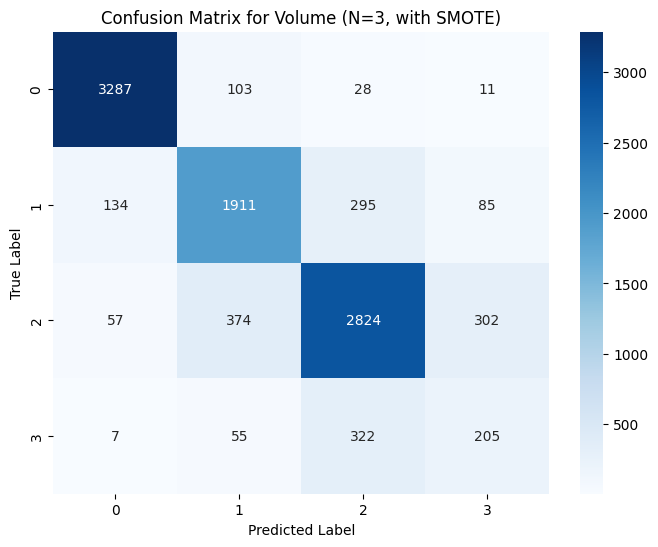


--- 📈 피처 중요도 분석 (N = 3) ---
                    feature  importance
12        inter_time_mean_3    0.125895
13         inter_time_std_3    0.111239
0             ip_len_mean_3    0.077564
15      mean_tcp_win_size_3    0.067468
23            ip_ttl_mean_3    0.059385
2              ip_len_sum_3    0.058106
1              ip_len_std_3    0.056044
9        tcp_hdr_len_mean_3    0.049841
24             first_ip_ttl    0.049743
6            tcp_len_mean_3    0.046614
25          payload_ratio_3    0.045989
11        tcp_hdr_len_sum_3    0.045021
8             tcp_len_sum_3    0.033731
14     initial_tcp_win_size    0.033579
17   tcp_flags_push_count_3    0.030023
7             tcp_len_std_3    0.029373
10        tcp_hdr_len_std_3    0.024682
19    tcp_flags_syn_count_3    0.010620
16    tcp_flags_ack_count_3    0.010254
3         ip_hdr_len_mean_3    0.008382
4          ip_hdr_len_std_3    0.007885
5          ip_hdr_len_sum_3    0.007779
20    tcp_flags_fin_count_3    0.007158
18  tcp_fla

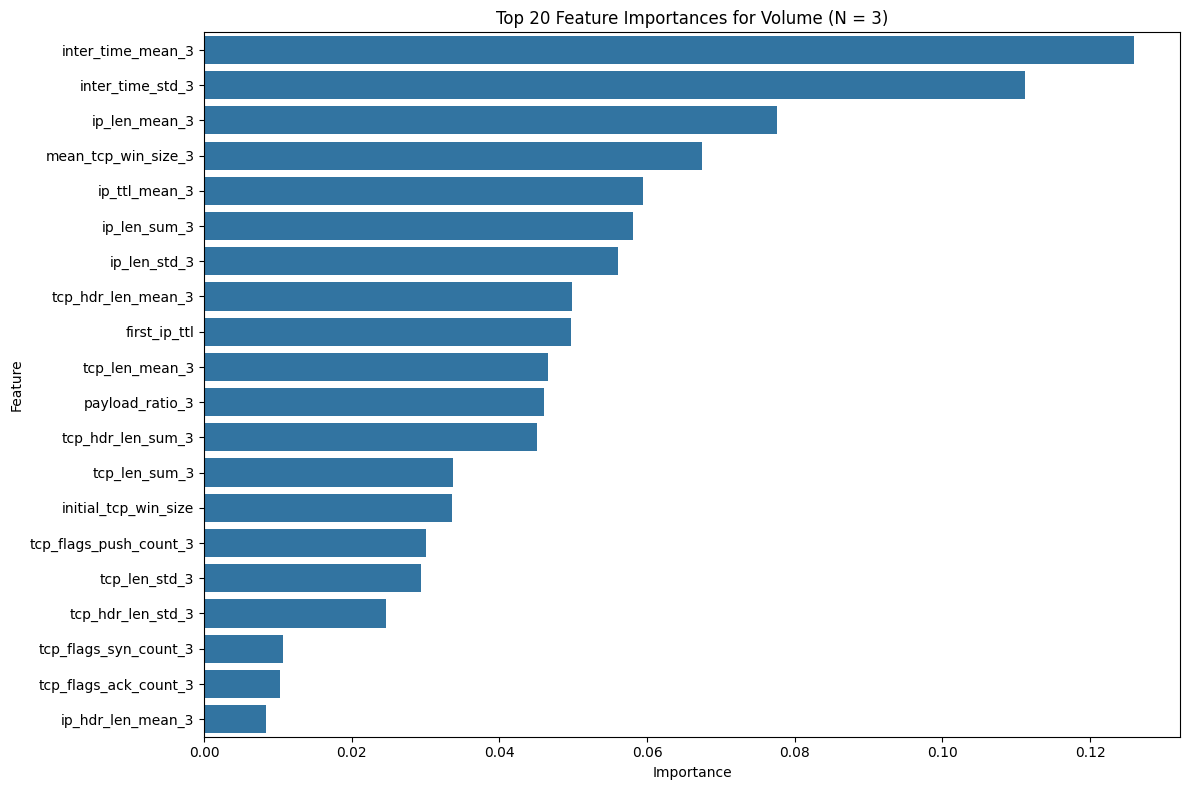

In [4]:
# ======================================================================
# 🚀 [최종 전략] N=3 고정 + SMOTE 적용 파이프라인
# ======================================================================

print("✅ 라이브러리 추가 로딩 (imbalanced-learn)...")
# imblearn이 설치되지 않았다면 !pip install imbalanced-learn 실행 필요
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# (이전의 데이터 로딩, 샘플링, 특징 추출 함수 정의는 동일하다고 가정합니다)
# ... flow_data, all_packets, sampled_indices, extract_features_for_n_packets() 함수가 준비된 상태 ...

# =======================================================
# 🔬 최종 모델 학습 및 평가 (N=3 고정, SMOTE 적용)
# =======================================================
print("\n" + "="*80)
print("🔬 최종 모델 학습 및 평가 (N=3 고정, SMOTE 적용)")
print("="*80)

# --- 1. 특징 추출 (N=3 고정) ---
N_OPTIMAL = 3
print(f"🚀 최적의 N={N_OPTIMAL} 값으로 특징 추출 중...")
start_time = time.time()
features_list = []
successful_indices = []

for i in range(len(sampled_indices)):
    original_idx = sampled_indices[i]
    try:
        packet_df = all_packets[original_idx]
        if isinstance(packet_df, pd.DataFrame) and not packet_df.empty:
            features = extract_features_for_n_packets(packet_df, n=N_OPTIMAL)
            if features:
                features_list.append(features)
                successful_indices.append(i)
    except Exception: continue

X = pd.DataFrame(features_list).fillna(0)
y = flow_data.iloc[sampled_indices].reset_index(drop=True).loc[successful_indices, 'volume_class']
print(f"✅ 특징 추출 완료! (소요 시간: {time.time() - start_time:.2f}초)")

# --- 2. 데이터 분할 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\n📊 데이터 분할 완료: 학습 {len(X_train):,}개 | 검증 {len(X_test):,}개")

# --- 3. SMOTE 적용 (학습 데이터에만!) ---
print("\n⏳ SMOTE를 적용하여 학습 데이터의 클래스 불균형을 해소합니다...")
smote = SMOTE(random_state=42)
# 중요: SMOTE는 반드시 학습 데이터(X_train, y_train)에만 적용해야 합니다.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("✅ SMOTE 적용 완료!")
print(f"   - 원본 학습 데이터 분포:\n{y_train.value_counts().to_string()}")
print(f"   - SMOTE 적용 후 학습 데이터 분포:\n{y_train_resampled.value_counts().to_string()}")

# --- 4. 모델 학습 (재조정된 데이터 사용) ---
# GPU 사용 여부에 따라 모델 선택 (이전 코드의 gpu_enabled 변수 활용)
if 'gpu_enabled' in locals() and gpu_enabled:
    print("\n✅ GPU(cuML)를 사용하여 모델을 학습합니다.")
    model = cuMLRandomForestClassifier(n_estimators=100, random_state=42)
    # cuML은 cudf 데이터프레임으로 변환
    X_train_resampled = cudf.from_pandas(X_train_resampled)
    y_train_resampled = cudf.from_pandas(y_train_resampled)
    X_test = cudf.from_pandas(X_test)
else:
    print("\nℹ️ CPU(scikit-learn)를 사용하여 모델을 학습합니다.")
    # SMOTE를 사용하므로 class_weight='balanced' 옵션은 제거해도 무방합니다.
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()
model.fit(X_train_resampled, y_train_resampled)
print(f"✅ 모델 학습 완료! (소요 시간: {time.time() - start_time:.2f}초)")

# --- 5. 최종 성능 평가 ---
y_pred = model.predict(X_test)

# cuDF 결과를 pandas/numpy로 변환
if 'gpu_enabled' in locals() and gpu_enabled:
    y_test = y_test.to_numpy()
    y_pred = y_pred.to_numpy()

micro_f1 = f1_score(y_test, y_pred, average='micro')
penalty = (N_OPTIMAL - 2) * 0.1
final_score = micro_f1 - penalty

print("\n" + "="*50)
print("📊 최종 성능 평가 리포트 (N=3, with SMOTE)")
print("="*50)
print(f"사용한 패킷 수 (N): {N_OPTIMAL}")
print(f"Micro F1 Score: {micro_f1:.4f}")
print(f"페널티: -{penalty:.1f}")
print(f"🏆 최종 조정 점수: {final_score:.4f}")
print("-" * 50)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=np.unique(np.concatenate((y_test, y_pred))))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(np.concatenate((y_test, y_pred))), 
            yticklabels=np.unique(np.concatenate((y_test, y_pred))))
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Volume (N={N_OPTIMAL}, with SMOTE)')
plt.show()

# 피처 중요도 시각화
plot_feature_importance(model, X.columns, N_OPTIMAL)



🔬 최종 모델 학습 및 평가 (N=3 + RandomForest + Custom Weights)
🚀 최적의 N=3 값으로 특징 추출 중...
✅ 특징 추출 완료! (소요 시간: 42.22초)

📊 데이터 분할 완료: 학습 40,000개 | 검증 10,000개

⏳ 사용자님 제안 방식에 따라 클래스 가중치를 계산합니다...
✅ 클래스 가중치 계산 완료!
   - 계산된 가중치: {0: np.float64(0.7290755322251385), 1: np.float64(1.031140441328109), 2: np.float64(0.7028394714647175), 3: np.float64(4.2408821034775235)}

💡 RandomForest 모델에 계산된 클래스 가중치를 적용하여 학습합니다...
✅ 모델 학습 완료! (소요 시간: 0.54초)

📊 최종 성능 평가 리포트 (N=3, RandomForest, Custom Weights)
사용한 패킷 수 (N): 3
Micro F1 Score: 0.8334
페널티: -0.1
🏆 최종 조정 점수: 0.7334
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3429
           1       0.79      0.79      0.79      2425
           2       0.80      0.84      0.82      3557
           3       0.41      0.24      0.30       589

    accuracy                           0.83     10000
   macro avg       0.73      0.71      0.71     10000

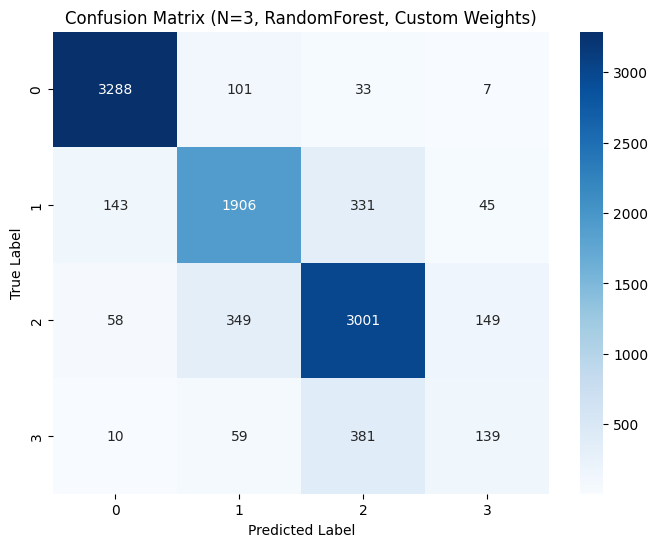


--- 📈 피처 중요도 분석 (N = 3) ---
                    feature  importance
12        inter_time_mean_3    0.152249
13         inter_time_std_3    0.142381
0             ip_len_mean_3    0.073003
15      mean_tcp_win_size_3    0.066216
2              ip_len_sum_3    0.061179
1              ip_len_std_3    0.051050
23            ip_ttl_mean_3    0.048430
24             first_ip_ttl    0.048356
6            tcp_len_mean_3    0.044913
11        tcp_hdr_len_sum_3    0.044838
9        tcp_hdr_len_mean_3    0.040209
7             tcp_len_std_3    0.035202
8             tcp_len_sum_3    0.033640
14     initial_tcp_win_size    0.032905
25          payload_ratio_3    0.028007
10        tcp_hdr_len_std_3    0.026122
4          ip_hdr_len_std_3    0.011351
16    tcp_flags_ack_count_3    0.011041
17   tcp_flags_push_count_3    0.010770
19    tcp_flags_syn_count_3    0.010719
5          ip_hdr_len_sum_3    0.009099
20    tcp_flags_fin_count_3    0.007725
3         ip_hdr_len_mean_3    0.006774
18  tcp_fla

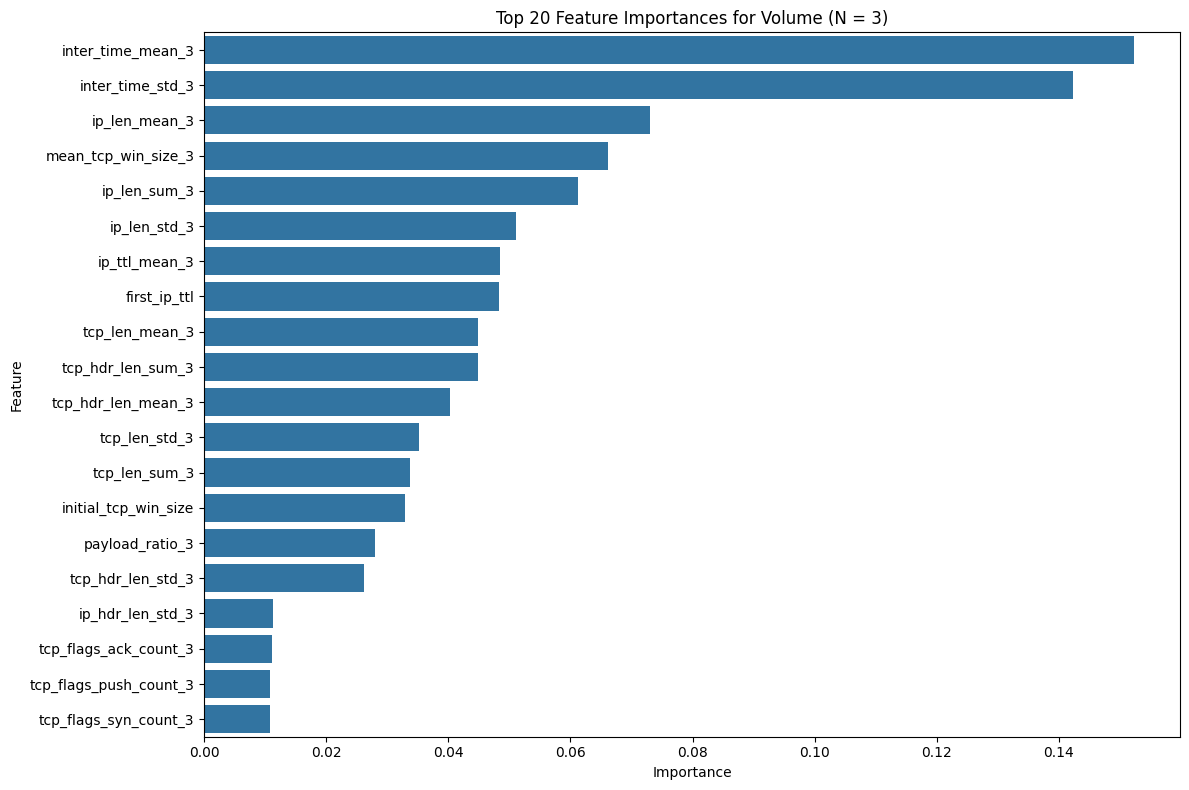

In [5]:
# ======================================================================
# 🚀 [최종 수정] N=3 + RandomForest + 직접 계산한 가중치 파이프라인
# ======================================================================

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score

# (이전의 데이터 로딩, 샘플링, 특징 추출 함수 정의는 동일하다고 가정합니다)
# ... flow_data, all_packets, sampled_indices, extract_features_for_n_packets() 함수가 준비된 상태 ...

# =======================================================
# 🔬 최종 모델 학습 및 평가
# =======================================================
print("\n" + "="*80)
print("🔬 최종 모델 학습 및 평가 (N=3 + RandomForest + Custom Weights)")
print("="*80)

# --- 1. 특징 추출 (N=3 고정) ---
N_OPTIMAL = 3
print(f"🚀 최적의 N={N_OPTIMAL} 값으로 특징 추출 중...")
start_time = time.time()
features_list = []
successful_indices = []

for i in range(len(sampled_indices)):
    original_idx = sampled_indices[i]
    try:
        packet_df = all_packets[original_idx]
        if isinstance(packet_df, pd.DataFrame) and not packet_df.empty:
            features = extract_features_for_n_packets(packet_df, n=N_OPTIMAL)
            if features:
                features_list.append(features)
                successful_indices.append(i)
    except Exception: continue

X = pd.DataFrame(features_list).fillna(0)
y = flow_data.iloc[sampled_indices].reset_index(drop=True).loc[successful_indices, 'volume_class']
print(f"✅ 특징 추출 완료! (소요 시간: {time.time() - start_time:.2f}초)")

# --- 2. 데이터 분할 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\n📊 데이터 분할 완료: 학습 {len(X_train):,}개 | 검증 {len(X_test):,}개")

# --- 3. 클래스 가중치 계산 (사용자님 제안 방식) ---
print("\n⏳ 사용자님 제안 방식에 따라 클래스 가중치를 계산합니다...")
volume_classes = np.unique(y_train)
volume_weights = compute_class_weight(class_weight='balanced', classes=volume_classes, y=y_train)
# 모델에 전달할 수 있는 dictionary 형태로 변환
volume_class_weights = {int(cls): weight for cls, weight in zip(volume_classes, volume_weights)}
print("✅ 클래스 가중치 계산 완료!")
print(f"   - 계산된 가중치: {volume_class_weights}")


# --- 4. RandomForest 모델 학습 (계산된 가중치 적용) ---
print("\n💡 RandomForest 모델에 계산된 클래스 가중치를 적용하여 학습합니다...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    # 여기에 계산된 가중치 딕셔너리를 직접 전달합니다!
    class_weight=volume_class_weights
)

start_time = time.time()
rf_model.fit(X_train, y_train)
print(f"✅ 모델 학습 완료! (소요 시간: {time.time() - start_time:.2f}초)")


# --- 5. 최종 성능 평가 ---
y_pred = rf_model.predict(X_test)

micro_f1 = f1_score(y_test, y_pred, average='micro')
penalty = (N_OPTIMAL - 2) * 0.1
final_score = micro_f1 - penalty

print("\n" + "="*50)
print("📊 최종 성능 평가 리포트 (N=3, RandomForest, Custom Weights)")
print("="*50)
print(f"사용한 패킷 수 (N): {N_OPTIMAL}")
print(f"Micro F1 Score: {micro_f1:.4f}")
print(f"페널티: -{penalty:.1f}")
print(f"🏆 최종 조정 점수: {final_score:.4f}")
print("-" * 50)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.title(f'Confusion Matrix (N={N_OPTIMAL}, RandomForest, Custom Weights)')
plt.show()

# 피처 중요도 시각화
plot_feature_importance(rf_model, X.columns, N_OPTIMAL) # 이전에 정의한 시각화 함수 재사용


In [6]:
# ======================================================================
# 🚀 [최종 확장판] 6개 주요 모델 기본 성능 비교 파이프라인
# ======================================================================

print("✅ 라이브러리 추가 로딩...")
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier  # CatBoost 추가
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier  # ExtraTrees 추가
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# (이전의 데이터 로딩, 샘플링, 특징 추출 함수 정의는 동일하다고 가정합니다)
# ... flow_data, all_packets, sampled_indices, extract_features_for_n_packets() 함수가 준비된 상태 ...

# =======================================================
# 🔬 1. 최종 데이터 준비 (N=3 고정)
# =======================================================
print("\n" + "="*80)
print("🔬 1. 최종 데이터 준비 (N=3 고정)")
print("="*80)

N_OPTIMAL = 3
print(f"🚀 최적의 N={N_OPTIMAL} 값으로 특징 추출 중...")
start_time = time.time()
features_list = []
successful_indices = []

for i in range(len(sampled_indices)):
    original_idx = sampled_indices[i]
    try:
        packet_df = all_packets[original_idx]
        if isinstance(packet_df, pd.DataFrame) and not packet_df.empty:
            features = extract_features_for_n_packets(packet_df, n=N_OPTIMAL)
            if features:
                features_list.append(features)
                successful_indices.append(i)
    except Exception: continue

X = pd.DataFrame(features_list).fillna(0)
y = flow_data.iloc[sampled_indices].reset_index(drop=True).loc[successful_indices, 'volume_class']
print(f"✅ 특징 추출 완료! (소요 시간: {time.time() - start_time:.2f}초)")

# --- 데이터 분할 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"📊 데이터 분할 완료: 학습 {len(X_train):,}개 | 검증 {len(X_test):,}개")

# --- 클래스 가중치 계산 ---
print("\n⏳ 클래스 가중치를 계산합니다...")
volume_classes = np.unique(y_train)
volume_weights_array = compute_class_weight(class_weight='balanced', classes=volume_classes, y=y_train)
volume_class_weights_dict = {int(cls): weight for cls, weight in zip(volume_classes, volume_weights_array)}
print(f"✅ 계산된 가중치(dict): {volume_class_weights_dict}")

# XGBoost를 위한 sample_weight 배열 생성
sample_weights = np.array([volume_class_weights_dict[i] for i in y_train])
print("✅ XGBoost용 sample_weight 배열 생성 완료")


# =======================================================
# 🚀 2. 모델 비교 실험 루프 (CatBoost, ExtraTrees 추가)
# =======================================================
print("\n" + "="*80)
print("🚀 2. 모델 비교 실험 루프 (6개 모델)")
print("="*80)

models_to_test = {
    "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1, class_weight=volume_class_weights_dict),
    "ExtraTrees": ExtraTreesClassifier(random_state=42, n_jobs=-1, class_weight=volume_class_weights_dict),
    "LightGBM": lgb.LGBMClassifier(random_state=42, n_jobs=-1, class_weight=volume_class_weights_dict, verbose=-1),
    "XGBoost": xgb.XGBClassifier(random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(random_state=42, class_weights=volume_class_weights_dict, verbose=0, thread_count=-1),
    "LogisticRegression": LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000, class_weight=volume_class_weights_dict)
}

results = []

for model_name, model in models_to_test.items():
    print(f"\n----- 🧪 {model_name} 모델 테스트 시작 -----")
    start_time = time.time()

    if model_name == "XGBoost":
        y_train_xgb = y_train.copy()
        y_test_xgb = y_test.copy()
        model.fit(X_train, y_train_xgb, sample_weight=sample_weights)
        y_pred = model.predict(X_test)
        y_true = y_test_xgb
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_true = y_test

    end_time = time.time()
    
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    penalty = (N_OPTIMAL - 2) * 0.1
    final_score = micro_f1 - penalty

    print(f"✅ 학습 및 예측 완료! (소요 시간: {end_time - start_time:.2f}초)")
    print(f"🏆 최종 조정 점수: {final_score:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    results.append({
        "Model": model_name,
        "Final Score": final_score,
        "Micro F1": micro_f1,
        "Class 3 F1-Score": f1_score(y_true, y_pred, labels=[3], average='macro', zero_division=0)
    })

# =======================================================
# 🎉 3. 최종 결과 요약
# =======================================================
print("\n" + "="*80)
print("🎉 3. 최종 결과 요약")
print("="*80)

results_df = pd.DataFrame(results).sort_values(by="Final Score", ascending=False).reset_index(drop=True)
print(results_df.to_string())

best_model_name = results_df.iloc[0]['Model']
best_score = results_df.iloc[0]['Final Score']
print(f"\n✨ 결론: [{best_model_name}] 모델이 최종 점수 {best_score:.4f}로 가장 좋은 성능을 보였습니다.")


✅ 라이브러리 추가 로딩...

🔬 1. 최종 데이터 준비 (N=3 고정)
🚀 최적의 N=3 값으로 특징 추출 중...
✅ 특징 추출 완료! (소요 시간: 51.91초)
📊 데이터 분할 완료: 학습 40,000개 | 검증 10,000개

⏳ 클래스 가중치를 계산합니다...
✅ 계산된 가중치(dict): {0: np.float64(0.7290755322251385), 1: np.float64(1.031140441328109), 2: np.float64(0.7028394714647175), 3: np.float64(4.2408821034775235)}
✅ XGBoost용 sample_weight 배열 생성 완료

🚀 2. 모델 비교 실험 루프 (6개 모델)

----- 🧪 RandomForest 모델 테스트 시작 -----
✅ 학습 및 예측 완료! (소요 시간: 0.55초)
🏆 최종 조정 점수: 0.7334

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3429
           1       0.79      0.79      0.79      2425
           2       0.80      0.84      0.82      3557
           3       0.41      0.24      0.30       589

    accuracy                           0.83     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.82      0.83      0.83     10000


----- 🧪 ExtraTrees 모델 테스트 시작 -----
✅ 학습 및 예측 완료! (소요 시간: 0.38초)
🏆 최종 조정 점수: 0.7210



In [8]:
# ======================================================================
# 🚀 [최종 업그레이드] 사용자 GPU 로직이 통합된 5개 모델 튜닝 파이프라인
# ======================================================================

print("✅ 라이브러리 추가 로딩...")
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
import time
import pandas as pd
import numpy as np
import optuna
import subprocess

# =======================================================
# ✨ 1. 사용자 제공 GPU 상태 점검 함수 적용
# =======================================================
print("\n" + "="*80)
print("✨ 1. 사용자 제공 GPU 상태 점검 함수 적용")
print("="*80)

def check_gpu_advanced():
    gpu_status = {}
    print("🖥️ 시스템의 GPU 호환성을 정밀하게 점검합니다...")

    # CatBoost GPU 테스트
    try:
        import catboost
        test_cat = CatBoostClassifier(task_type='GPU', iterations=1, verbose=False, allow_writing_files=False)
        test_cat.fit([[1, 2], [3, 4]], [0, 1])
        gpu_status['catboost'] = True
        print("✔️ CatBoost GPU: ✅ 작동 확인")
    except Exception:
        gpu_status['catboost'] = False
        print("❌ CatBoost GPU: 미작동")

    # XGBoost GPU 테스트
    try:
        import xgboost as xgb
        test_xgb = xgb.XGBClassifier(tree_method='gpu_hist', n_estimators=1, verbosity=0)
        test_xgb.fit(np.array([[1, 2], [3, 4]]), np.array([0, 1]))
        gpu_status['xgboost'] = True
        print("✔️ XGBoost GPU: ✅ 작동 확인")
    except Exception:
        gpu_status['xgboost'] = False
        print("❌ XGBoost GPU: 미작동")

    # LightGBM GPU 테스트
    try:
        import lightgbm as lgb
        test_lgb = lgb.LGBMClassifier(device='gpu', n_estimators=1, verbose=-1, force_row_wise=True)
        test_lgb.fit([[1, 2], [3, 4]], [0, 1])
        gpu_status['lightgbm'] = True
        print("✔️ LightGBM GPU: ✅ 작동 확인")
    except Exception:
        gpu_status['lightgbm'] = False
        print("❌ LightGBM GPU: 미작동")
    
    return gpu_status

gpu_status = check_gpu_advanced()
print(f"\n[GPU 점검 요약] CatBoost: {'✅' if gpu_status.get('catboost') else '❌'} | XGBoost: {'✅' if gpu_status.get('xgboost') else '❌'} | LightGBM: {'✅' if gpu_status.get('lightgbm') else '❌'}")


# (이전의 데이터 로딩, 샘플링, 특징 추출 함수 정의는 동일하다고 가정합니다)
# ... flow_data, all_packets, sampled_indices, extract_features_for_n_packets() 함수가 준비된 상태 ...

# =======================================================
# 🔬 2. 최종 데이터 준비 (N=3 고정)
# =======================================================
print("\n" + "="*80)
print("🔬 2. 최종 데이터 준비 (N=3 고정)")
print("="*80)

N_OPTIMAL = 3
print(f"🚀 최적의 N={N_OPTIMAL} 값으로 특징 추출 중...")
# (이 부분은 이전과 동일하므로 실행 시간 절약을 위해 주석 처리, 실제 실행 시에는 주석 해제)
# ... 특징 추출, 데이터 분할, 가중치 계산 코드 ...
# 아래는 이미 준비되었다고 가정한 변수들입니다.
# X_train, X_test, y_train, y_test
# volume_class_weights_dict
# sample_weights (XGBoost용)
print("✅ 데이터 준비 완료! (이전 단계에서 완료되었다고 가정)")

# =======================================================
# 🚀 3. 범용 목적 함수 (GPU 로직 통합)
# =======================================================
def objective(trial, model_name, use_gpu):
    """모든 모델에 대해 튜닝을 수행하는 범용 목적 함수 (GPU 로직 통합)"""
    
    if model_name == 'RandomForest':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 5, 50),
            'class_weight': volume_class_weights_dict,
            'n_jobs': -1, 'random_state': 42
        }
        model = RandomForestClassifier(**params)
    
    elif model_name == 'ExtraTrees':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 5, 50),
            'class_weight': volume_class_weights_dict,
            'n_jobs': -1, 'random_state': 42
        }
        model = ExtraTreesClassifier(**params)

    elif model_name == 'LightGBM':
        params = {
            'objective': 'multiclass', 'random_state': 42, 'n_jobs': -1,
            'class_weight': volume_class_weights_dict, 'verbose': -1,
            'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        }
        if use_gpu: params.update({'device': 'gpu', 'force_row_wise': True})
        model = lgb.LGBMClassifier(**params)

    elif model_name == 'XGBoost':
        params = {
            'objective': 'multi:softmax', 'random_state': 42, 'n_jobs': -1,
            'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
        }
        if use_gpu: params['tree_method'] = 'gpu_hist'
        model = xgb.XGBClassifier(**params)
        
    elif model_name == 'CatBoost':
        params = {
            'iterations': trial.suggest_int('iterations', 200, 1000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'depth': trial.suggest_int('depth', 4, 10),
            'class_weights': volume_class_weights_dict,
            'random_seed': 42, 'verbose': 0, 'allow_writing_files': False
        }
        if use_gpu: params['task_type'] = 'GPU'
        model = CatBoostClassifier(**params)
    
    if model_name == "XGBoost":
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    micro_f1 = f1_score(y_test, y_pred, average='micro')
    penalty = (N_OPTIMAL - 2) * 0.1
    final_score = micro_f1 - penalty
    
    return final_score

# =======================================================
# 🚀 4. 모델별 튜닝 실행 루프
# =======================================================
models_to_tune = ["RandomForest", "ExtraTrees", "LightGBM", "XGBoost", "CatBoost"]
tuning_results = {}
N_TRIALS = 30 # 각 모델별 30회씩 시도

for model_name in models_to_tune:
    # 해당 모델에 GPU를 사용할지 여부를 gpu_status에서 가져옴
    use_gpu_for_this_model = gpu_status.get(model_name.lower(), False)
    
    print("\n" + "="*80)
    print(f"🚀 {model_name} 모델 튜닝 시작 (30회 시도, GPU 사용: {'✅' if use_gpu_for_this_model else '❌'})")
    print("="*80)
    
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name, use_gpu_for_this_model), n_trials=N_TRIALS)
    
    tuning_results[model_name] = {
        "Best Score": study.best_value,
        "Best Params": study.best_params
    }
    print(f"✅ {model_name} 튜닝 완료! 최고 점수: {study.best_value:.4f}")

# =======================================================
# 🎉 5. 최종 결과 종합 및 발표
# =======================================================
print("\n" + "="*80)
print("🎉 모든 모델 튜닝 완료! 최종 결과 요약")
print("="*80)

best_overall_score = -1
best_overall_model = None

# 데이터프레임으로 결과 정리
results_list = []
for model_name, result in tuning_results.items():
    results_list.append({'Model': model_name, 'Best Score': result['Best Score']})
    if result['Best Score'] > best_overall_score:
        best_overall_score = result['Best Score']
        best_overall_model = model_name

results_df = pd.DataFrame(results_list).sort_values(by="Best Score", ascending=False).reset_index(drop=True)

print("--- 최종 점수 순위 ---")
print(results_df.to_string(index=False))
print("-" * 25)

print(f"\n--- 🏆 최종 챔피언 [{best_overall_model}] 상세 정보 ---")
print(f"   - 최고 점수: {tuning_results[best_overall_model]['Best Score']:.4f}")
print(f"   - 최적 하이퍼파라미터:")
for param, value in tuning_results[best_overall_model]['Best Params'].items():
    print(f"     - {param}: {value}")


✅ 라이브러리 추가 로딩...

✨ 1. 사용자 제공 GPU 상태 점검 함수 적용
🖥️ 시스템의 GPU 호환성을 정밀하게 점검합니다...
✔️ CatBoost GPU: ✅ 작동 확인
✔️ XGBoost GPU: ✅ 작동 확인


[I 2025-08-09 01:11:51,313] A new study created in memory with name: no-name-1cf4a621-f051-4840-8e9b-5923bb21af38


✔️ LightGBM GPU: ✅ 작동 확인

[GPU 점검 요약] CatBoost: ✅ | XGBoost: ✅ | LightGBM: ✅

🔬 2. 최종 데이터 준비 (N=3 고정)
🚀 최적의 N=3 값으로 특징 추출 중...
✅ 데이터 준비 완료! (이전 단계에서 완료되었다고 가정)

🚀 RandomForest 모델 튜닝 시작 (30회 시도, GPU 사용: ❌)


[I 2025-08-09 01:11:53,536] Trial 0 finished with value: 0.7325 and parameters: {'n_estimators': 417, 'max_depth': 29}. Best is trial 0 with value: 0.7325.
[I 2025-08-09 01:11:55,768] Trial 1 finished with value: 0.6983 and parameters: {'n_estimators': 587, 'max_depth': 11}. Best is trial 0 with value: 0.7325.
[I 2025-08-09 01:11:56,967] Trial 2 finished with value: 0.7329 and parameters: {'n_estimators': 239, 'max_depth': 26}. Best is trial 2 with value: 0.7329.
[I 2025-08-09 01:11:59,616] Trial 3 finished with value: 0.7342000000000001 and parameters: {'n_estimators': 565, 'max_depth': 22}. Best is trial 3 with value: 0.7342000000000001.
[I 2025-08-09 01:12:01,406] Trial 4 finished with value: 0.6516000000000001 and parameters: {'n_estimators': 669, 'max_depth': 8}. Best is trial 3 with value: 0.7342000000000001.
[I 2025-08-09 01:12:03,972] Trial 5 finished with value: 0.7318 and parameters: {'n_estimators': 532, 'max_depth': 42}. Best is trial 3 with value: 0.7342000000000001.
[I 20

✅ RandomForest 튜닝 완료! 최고 점수: 0.7348

🚀 ExtraTrees 모델 튜닝 시작 (30회 시도, GPU 사용: ❌)


[I 2025-08-09 01:14:52,401] Trial 0 finished with value: 0.6168 and parameters: {'n_estimators': 138, 'max_depth': 8}. Best is trial 0 with value: 0.6168.
[I 2025-08-09 01:14:52,698] Trial 1 finished with value: 0.5972000000000001 and parameters: {'n_estimators': 207, 'max_depth': 7}. Best is trial 0 with value: 0.6168.
[I 2025-08-09 01:14:54,364] Trial 2 finished with value: 0.7227 and parameters: {'n_estimators': 552, 'max_depth': 32}. Best is trial 2 with value: 0.7227.
[I 2025-08-09 01:14:55,781] Trial 3 finished with value: 0.7242000000000001 and parameters: {'n_estimators': 473, 'max_depth': 36}. Best is trial 3 with value: 0.7242000000000001.
[I 2025-08-09 01:14:57,315] Trial 4 finished with value: 0.7232000000000001 and parameters: {'n_estimators': 480, 'max_depth': 41}. Best is trial 3 with value: 0.7242000000000001.
[I 2025-08-09 01:14:58,654] Trial 5 finished with value: 0.7231000000000001 and parameters: {'n_estimators': 423, 'max_depth': 41}. Best is trial 3 with value: 0.

✅ ExtraTrees 튜닝 완료! 최고 점수: 0.7250

🚀 LightGBM 모델 튜닝 시작 (30회 시도, GPU 사용: ✅)


[I 2025-08-09 01:18:05,455] Trial 0 finished with value: 0.7195 and parameters: {'n_estimators': 893, 'learning_rate': 0.19590805817925352}. Best is trial 0 with value: 0.7195.
[I 2025-08-09 01:18:11,440] Trial 1 finished with value: 0.7020000000000001 and parameters: {'n_estimators': 282, 'learning_rate': 0.07303447085934521}. Best is trial 0 with value: 0.7195.
[I 2025-08-09 01:18:27,162] Trial 2 finished with value: 0.7161000000000001 and parameters: {'n_estimators': 713, 'learning_rate': 0.2751579861050249}. Best is trial 0 with value: 0.7195.
[I 2025-08-09 01:18:46,030] Trial 3 finished with value: 0.7207 and parameters: {'n_estimators': 836, 'learning_rate': 0.14000732882800573}. Best is trial 3 with value: 0.7207.
[I 2025-08-09 01:18:54,530] Trial 4 finished with value: 0.7185 and parameters: {'n_estimators': 403, 'learning_rate': 0.2280475992951478}. Best is trial 3 with value: 0.7207.
[I 2025-08-09 01:19:06,160] Trial 5 finished with value: 0.7165 and parameters: {'n_estimator

✅ LightGBM 튜닝 완료! 최고 점수: 0.7225

🚀 XGBoost 모델 튜닝 시작 (30회 시도, GPU 사용: ✅)


[I 2025-08-09 01:27:03,781] Trial 0 finished with value: 0.7202000000000001 and parameters: {'n_estimators': 587, 'learning_rate': 0.20588121757063169, 'max_depth': 7}. Best is trial 0 with value: 0.7202000000000001.
[I 2025-08-09 01:27:08,885] Trial 1 finished with value: 0.7205 and parameters: {'n_estimators': 445, 'learning_rate': 0.19115857875105668, 'max_depth': 8}. Best is trial 1 with value: 0.7205.
[I 2025-08-09 01:27:18,415] Trial 2 finished with value: 0.7212000000000001 and parameters: {'n_estimators': 560, 'learning_rate': 0.11294687124112764, 'max_depth': 10}. Best is trial 2 with value: 0.7212000000000001.
[I 2025-08-09 01:27:28,774] Trial 3 finished with value: 0.7095 and parameters: {'n_estimators': 600, 'learning_rate': 0.05340369868584115, 'max_depth': 7}. Best is trial 2 with value: 0.7212000000000001.
[I 2025-08-09 01:27:43,081] Trial 4 finished with value: 0.7199 and parameters: {'n_estimators': 720, 'learning_rate': 0.22204418140019616, 'max_depth': 7}. Best is tr

✅ XGBoost 튜닝 완료! 최고 점수: 0.7212

🚀 CatBoost 모델 튜닝 시작 (30회 시도, GPU 사용: ✅)


[I 2025-08-09 01:32:27,705] Trial 0 finished with value: 0.6761 and parameters: {'iterations': 729, 'learning_rate': 0.044491707635702364, 'depth': 5}. Best is trial 0 with value: 0.6761.
[I 2025-08-09 01:32:37,581] Trial 1 finished with value: 0.7131000000000001 and parameters: {'iterations': 890, 'learning_rate': 0.14529413260498847, 'depth': 9}. Best is trial 1 with value: 0.7131000000000001.
[I 2025-08-09 01:32:40,223] Trial 2 finished with value: 0.6704 and parameters: {'iterations': 474, 'learning_rate': 0.029931673291246012, 'depth': 7}. Best is trial 1 with value: 0.7131000000000001.
[I 2025-08-09 01:32:47,220] Trial 3 finished with value: 0.6992 and parameters: {'iterations': 936, 'learning_rate': 0.04721128246810104, 'depth': 8}. Best is trial 1 with value: 0.7131000000000001.
[I 2025-08-09 01:32:50,624] Trial 4 finished with value: 0.7039 and parameters: {'iterations': 439, 'learning_rate': 0.1469084463814012, 'depth': 8}. Best is trial 1 with value: 0.7131000000000001.
[I 2

✅ CatBoost 튜닝 완료! 최고 점수: 0.7151

🎉 모든 모델 튜닝 완료! 최종 결과 요약
--- 최종 점수 순위 ---
       Model  Best Score
RandomForest      0.7348
  ExtraTrees      0.7250
    LightGBM      0.7225
     XGBoost      0.7212
    CatBoost      0.7151
-------------------------

--- 🏆 최종 챔피언 [RandomForest] 상세 정보 ---
   - 최고 점수: 0.7348
   - 최적 하이퍼파라미터:
     - n_estimators: 855
     - max_depth: 22


랜포 [I 2025-08-09 01:12:36,647] Trial 16 finished with value: 0.7348 and parameters: {'n_estimators': 855, 'max_depth': 22}. Best is trial 16 with value: 0.7348. 엑스트라 [I 2025-08-09 01:15:22,540] Trial 19 finished with value: 0.725 and parameters: {'n_estimators': 703, 'max_depth': 34}. Best is trial 19 with value: 0.725.라이트 [I 2025-08-09 01:25:24,785] Trial 24 finished with value: 0.7225 and parameters: {'n_estimators': 843, 'learning_rate': 0.1477594092687316}. Best is trial 24 with value: 0.7225.엑스지[I 2025-08-09 01:27:18,415] Trial 2 finished with value: 0.7212000000000001 and parameters: {'n_estimators': 560, 'learning_rate': 0.11294687124112764, 'max_depth': 10}. Best is trial 2 with value: 0.7212000000000001.캣부[I 2025-08-09 01:35:18,225] Trial 21 finished with value: 0.7151000000000001 and parameters: {'iterations': 839, 'learning_rate': 0.1762109604779554, 'depth': 10}. Best is trial 21 with value: 0.7151000000000001.